In [1]:
!pip install opencv-python
!pip install scikit-image

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from numpy.lib.stride_tricks import as_strided
import PIL
from pandas import DataFrame
import pandas as pd
from IPython.display import display, HTML
from skimage.exposure import rescale_intensity
import json
import os
from itertools import product
import itertools
import random
import glob
from pathlib import Path
from datetime import datetime
import datetime
from matplotlib.colors import Normalize


def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels

pd.options.display.html.border = 0
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
if "google.colab" in str(get_ipython()):
    from google.colab.patches import cv2_imshow

    imshow = cv2_imshow
else:

    def imshow(img):
        img = img.clip(0, 255).astype("uint8")
        if img.ndim == 3:
            if img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
            else:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        display(PIL.Image.fromarray(img))

In [4]:
def h_color(a, interpolation=None, size=None, fy=1.5, fx=1.5, cmap="gray"):
    s = [int(a.shape[0] * fy), int(a.shape[1] * fx)] if size is None else size
    plt.figure(figsize=s)
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        labelleft=False,
        left=False,
        right=False,
    )
    plt.imshow(a, cmap=cmap, interpolation=interpolation)

In [5]:
css = """
<style type="text/css">
  table, td, table.dataframe, table.dataframe td {
    border: 1px solid black;    //border: double;
    border-collapse: collapse;
    border-style: solid;
    border-spacing: 0px;
    background-color: rgb(250,250,250);
    width: 24px;
    height: 24px;
    text-align: center;
    transform: scale(1.0);
    margin: 5px;
    }
</style>
"""


def h(s):
    return display(HTML(css + DataFrame(s).to_html(header=False, index=False)))

In [6]:
def h_color_3d(z):
    fig = go.Figure(data=[go.Surface(z=z)])
    fig.update_layout(autosize=False, width=500, height=500)
    fig.show()

### **Load Data**

### 1st Range : 090422 - 090612

In [7]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '090422'
end = '090612'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [8]:
dx= 5.106500953873407 
dt= 0.0016

data1 = []
first_filename = selected[0]
for file in selected:
   data1.append(np.load(file))
data1 = np.concatenate(data1)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data1), freq=f'{dt}s')
columns = np.arange(len(data1[0])) * dx
df1 = pd.DataFrame(data=data1, index=index, columns=columns)

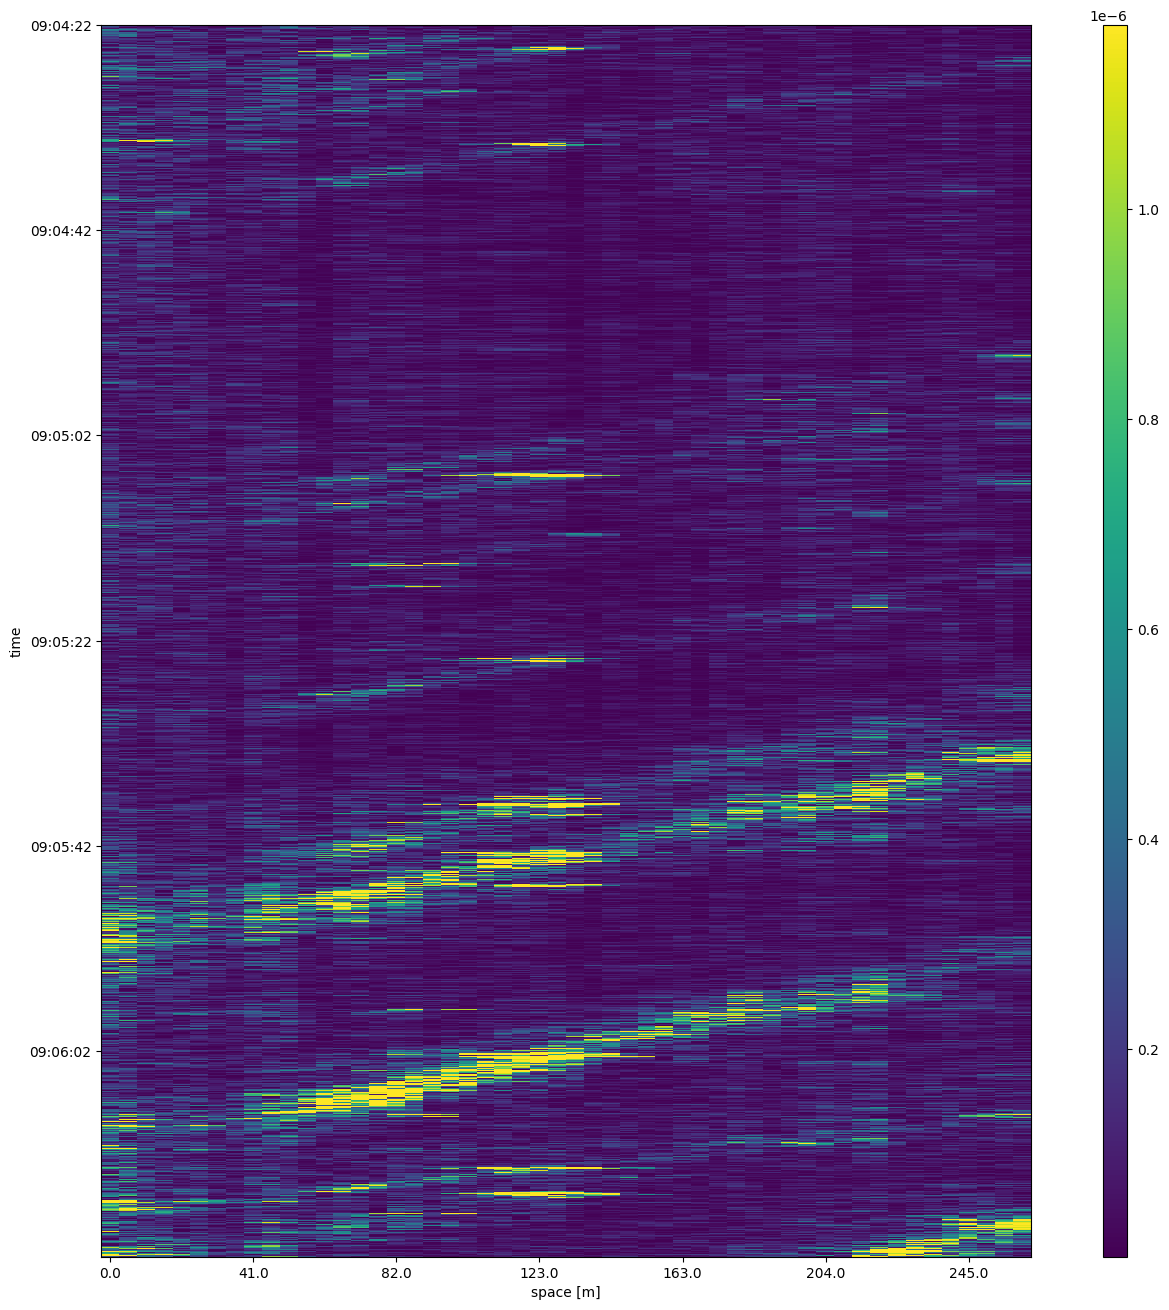

In [9]:


fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df1 -= df1.mean()
df1 = np.abs(df1) 
low, high = np.percentile(df1, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df1,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df1.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df1.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


### 2nd Range : 091152 - 091342

In [12]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '091152'
end = '091342'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [13]:
data2 = []
first_filename = selected[0]
for file in selected:
   data2.append(np.load(file))
data2 = np.concatenate(data2)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data2), freq=f'{dt}s')
columns = np.arange(len(data2[0])) * dx
df2 = pd.DataFrame(data=data2, index=index, columns=columns)

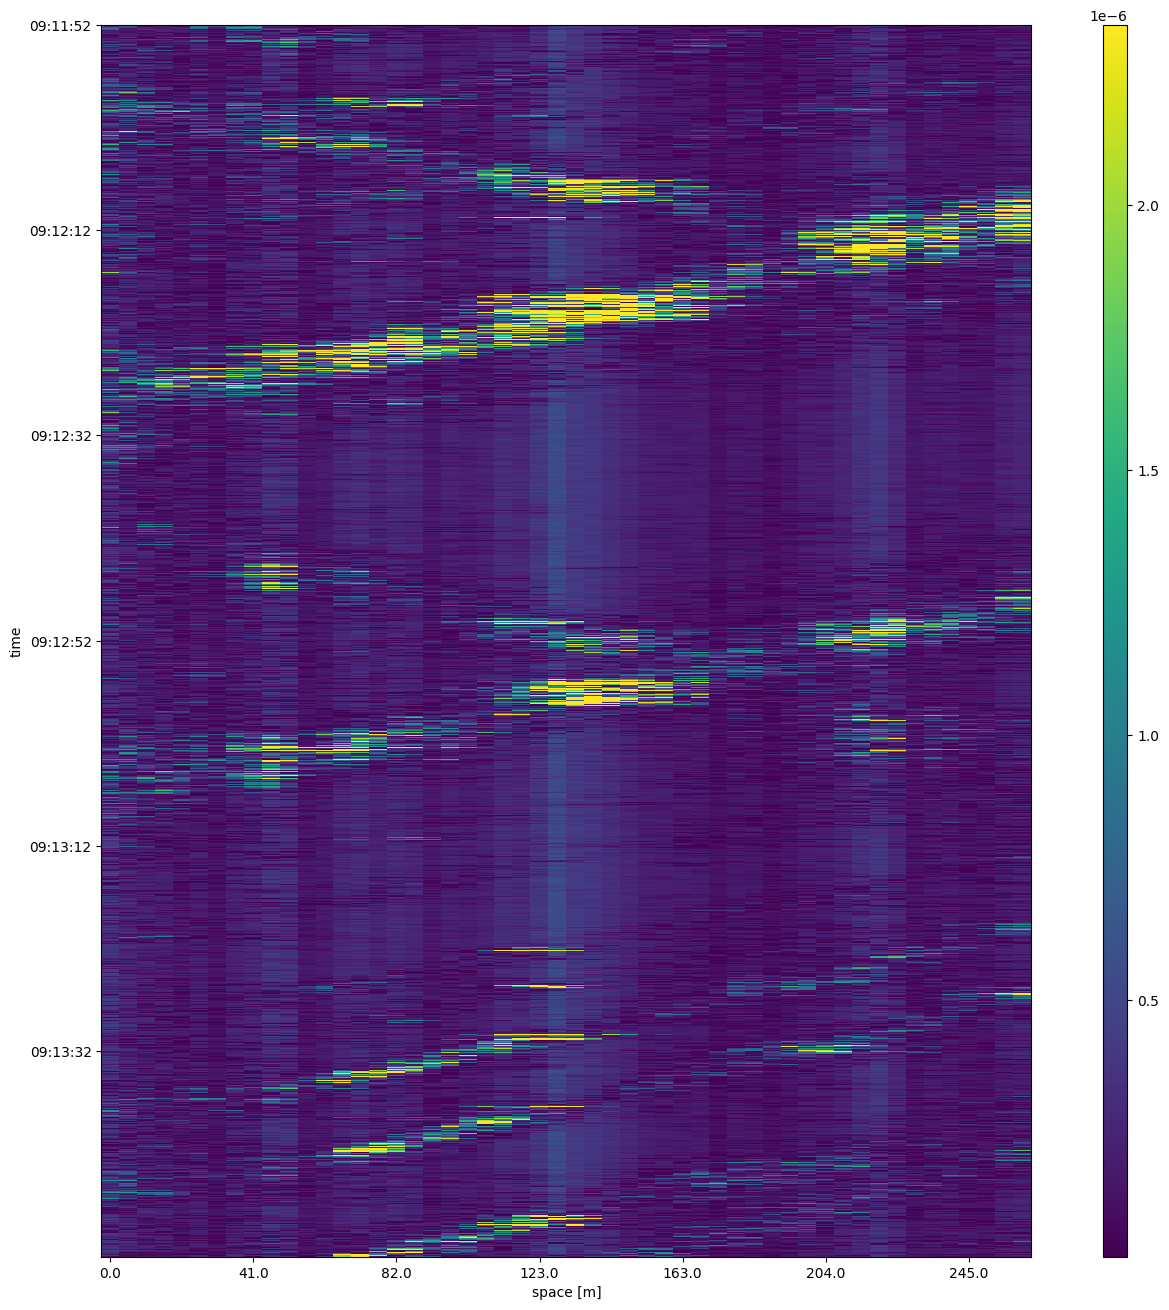

In [15]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df2 -= df2.mean()
df2 = np.abs(df2) 
low, high = np.percentile(df2, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df2,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df2.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df2.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

### 3rd Range : 094122 - 094312

In [20]:
pattern = os.path.join("..\\dataset", '*.npy')
files = sorted(glob.glob(pattern))
start = '094122'
end = '094312'
selected = [f for f in files if start <= os.path.basename(f)[:6] <= end]

In [21]:
data3 = []
first_filename = selected[0]
for file in selected:
   data3.append(np.load(file))
data3 = np.concatenate(data3)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data3), freq=f'{dt}s')
columns = np.arange(len(data3[0])) * dx
df3 = pd.DataFrame(data=data3, index=index, columns=columns)

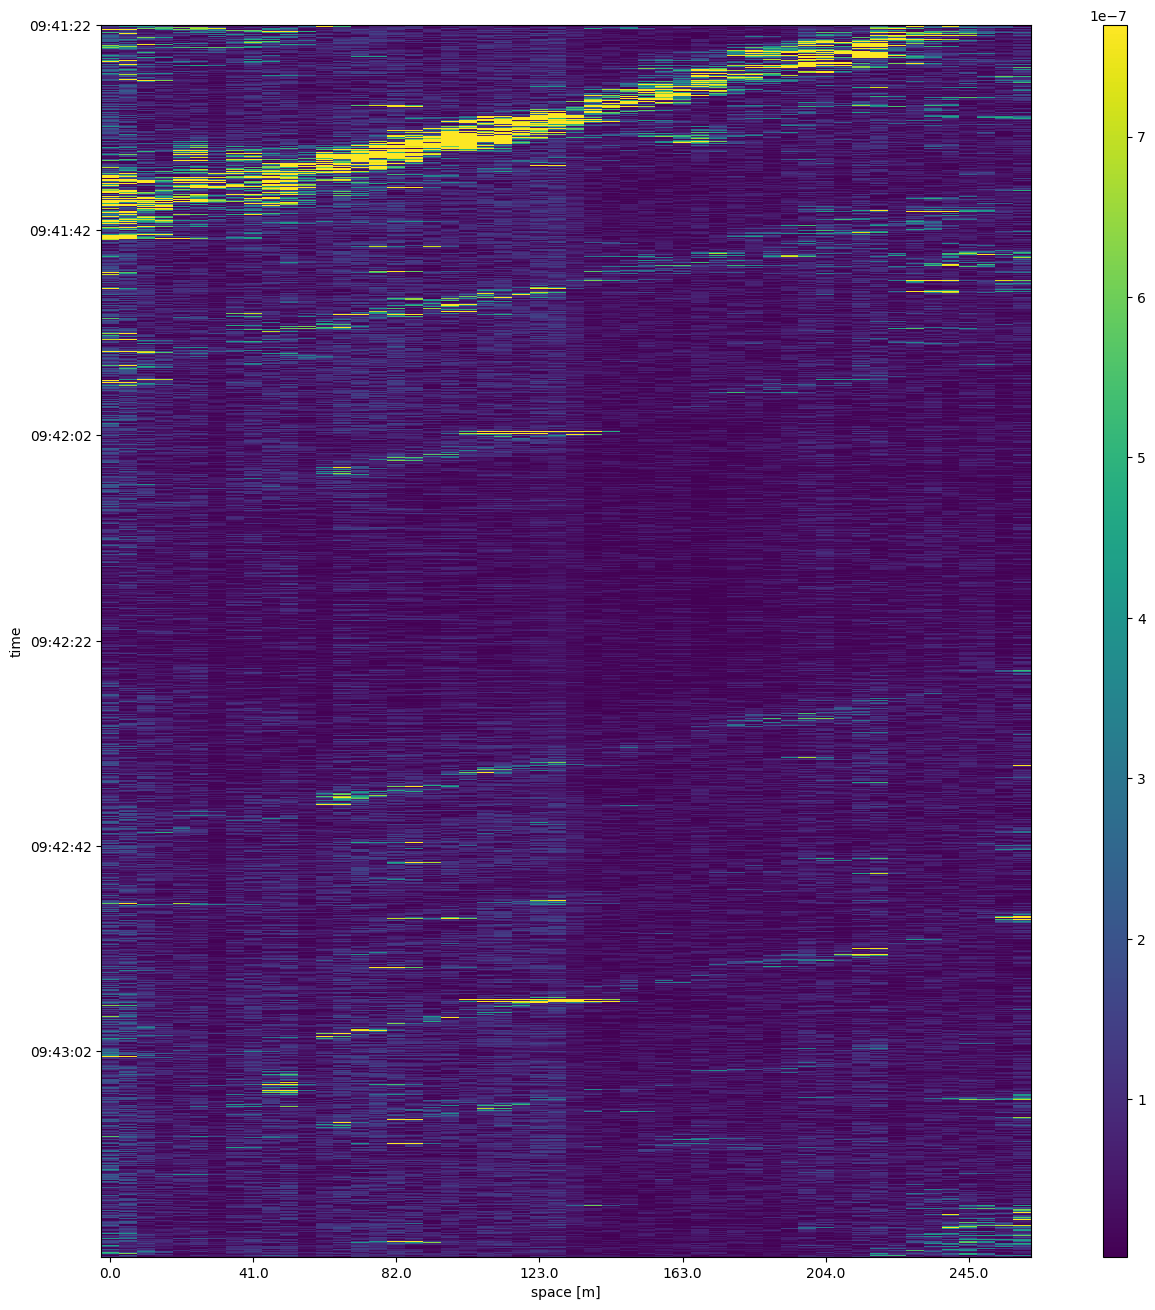

In [26]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df3 -= df3.mean()
df3 = np.abs(df3) 
low, high = np.percentile(df3, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df3,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df3.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df3.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()

### **FFT Analysis with OpenCV**

In [ ]:
# Regénérer les images à partir des données originales
import os

# Créer le dossier images s'il n'existe pas
os.makedirs('../images', exist_ok=True)

# Utiliser les données brutes (data1, data2, data3) au lieu des DataFrames modifiés
images_data = [
    (data1, 'range1_090422-090612.png'),
    (data2, 'range2_091152-091342.png'),
    (data3, 'range3_094122-094312.png')
]

for data, filename in images_data:
    # Préparation des données (même transformation que pour l'affichage)
    data_copy = data.copy()
    data_copy -= data_copy.mean()
    data_copy = np.abs(data_copy)
    low, high = np.percentile(data_copy, [3, 99])
    
    # Normaliser entre 0 et 255 pour sauvegarder en image
    img_normalized = ((data_copy - low) / (high - low) * 255).clip(0, 255).astype(np.uint8)
    
    # Sauvegarder avec OpenCV
    cv2.imwrite(f'../images/{filename}', img_normalized)
    print(f'✓ {filename}: {img_normalized.shape}')

print("\nImages régénérées avec succès!")

# Charger la première image pour la FFT
img_path = '../images/range1_090422-090612.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

print(f"\nImage chargée: {img.shape}")
print(f"Image dtype: {img.dtype}")

# Convertir en float32 (requis pour la FFT)
img_float = np.float32(img)

# Calculer la FFT avec OpenCV
dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)

# Décaler les quadrants pour centrer le spectre (basses fréquences au centre)
dft_shift = np.fft.fftshift(dft)

# Calculer le spectre de magnitude
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

# Afficher les résultats
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Image originale')
axes[0].axis('off')

axes[1].imshow(magnitude_spectrum, cmap='gray')
axes[1].set_title('Spectre de magnitude (FFT)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


#### Filtre passe-bas (Low-pass filter)

In [ ]:
# Créer un masque passe-bas circulaire
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
radius = 50  # Rayon du filtre (ajustez selon vos besoins)

# Créer un masque noir avec 2 canaux (pour la partie réelle et imaginaire)
mask = np.zeros((rows, cols, 2), np.uint8)
cv2.circle(mask, (ccol, crow), radius, (1, 1), -1)

# Appliquer le masque sur le spectre décalé
fshift_filtered = dft_shift * mask

# FFT inverse pour revenir à l'espace spatial
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# Normaliser pour l'affichage
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Image originale')
axes[0].axis('off')

axes[1].imshow(mask[:,:,0] * 255, cmap='gray')
axes[1].set_title(f'Masque passe-bas (rayon={radius})')
axes[1].axis('off')

axes[2].imshow(img_back, cmap='gray')
axes[2].set_title('Image après filtre passe-bas')
axes[2].axis('off')

plt.tight_layout()
plt.show()

#### Filtre passe-haut (High-pass filter)

In [ ]:
# Créer un masque passe-haut (inverse du passe-bas)
radius = 50  # Rayon du filtre

# Créer un masque blanc (tout passe)
mask_high = np.ones((rows, cols, 2), np.uint8)
# Créer un cercle noir au centre (bloque les basses fréquences)
cv2.circle(mask_high, (ccol, crow), radius, (0, 0), -1)

# Appliquer le masque
fshift_high = dft_shift * mask_high

# FFT inverse
f_ishift_high = np.fft.ifftshift(fshift_high)
img_high = cv2.idft(f_ishift_high)
img_high = cv2.magnitude(img_high[:,:,0], img_high[:,:,1])

# Normaliser
img_high = cv2.normalize(img_high, None, 0, 255, cv2.NORM_MINMAX)

# Afficher
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Image originale')
axes[0].axis('off')

axes[1].imshow(mask_high[:,:,0] * 255, cmap='gray')
axes[1].set_title(f'Masque passe-haut (rayon={radius})')
axes[1].axis('off')

axes[2].imshow(img_high, cmap='gray')
axes[2].set_title('Image après filtre passe-haut')
axes[2].axis('off')

plt.tight_layout()
plt.show()